In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import seaborn as sns
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# LAB 5 - Using link functions to create generalized linear models

### Import data

In [49]:
df = pd.read_csv('Airline_data.csv')
df['Miles flown [100 mln miles]'] = df['Miles flown [100 mln miles]'] / 1000
df.head()

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,3.863
1,1977,25,516,4.300
2,1978,31,754,5.027
3,1979,31,877,5.481
4,1980,22,814,5.814


In [50]:
df.describe()

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
count,10.00000,10.000000,10.000000,10.000000
mean,1980.50000,23.800000,691.900000,5.715800
std,3.02765,4.709329,252.389228,1.117768
min,1976.00000,16.000000,223.000000,3.863000
25%,1978.25000,21.250000,570.500000,5.140500
50%,1980.50000,23.000000,759.000000,5.845500
75%,1982.75000,25.750000,812.750000,6.175500
max,1985.00000,31.000000,1066.000000,7.433000


### PPC

In [51]:
model_ppc = CmdStanModel(stan_file='model_ppc.stan')

R = 1000
sim_ppc=model_ppc.sample(iter_sampling=R,
                         iter_warmup=0,
                         chains=1,
                         fixed_param=True,
                         seed=29042020,
                         refresh=R)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [52]:
sim_df = sim_ppc.draws_pd()
sim_df.head()

,lp__,accept_stat__,n,alpha,theta,y
0,0.0,0.0,8.69899,0.755436,0.487277,182.0
1,0.0,0.0,4.80273,1.079680,0.482952,25.0
2,0.0,0.0,6.53784,0.731194,0.502301,47.0
3,0.0,0.0,6.37884,0.595595,0.513120,60.0
4,0.0,0.0,5.34366,0.537774,0.516606,30.0


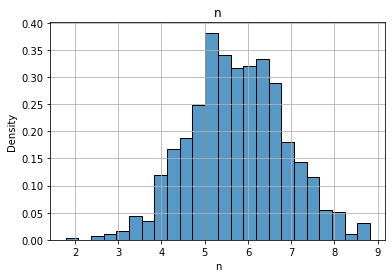

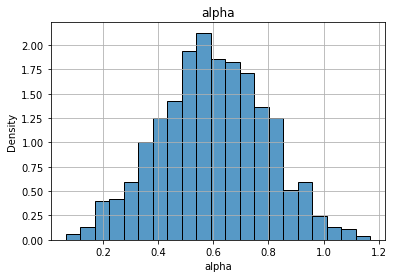

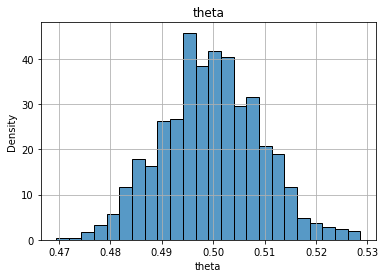

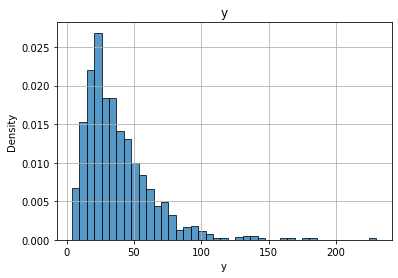

In [53]:
sns.histplot(data=sim_df, x='n', stat='density')
plt.grid(True)
plt.title('n')
plt.show()

sns.histplot(data=sim_df, x='alpha', stat='density')
plt.grid(True)
plt.title('alpha')
plt.show()

sns.histplot(data=sim_df, x='theta', stat='density')
plt.grid(True)
plt.title('theta')
plt.show()

sns.histplot(data=sim_df, x='y', stat='density')
plt.grid(True)
plt.title('y')
plt.show()

### FIT

In [54]:
model_fit1 = CmdStanModel(stan_file='model_fit1.stan')

fit = model_fit1.sample(data={"n": df.shape[0], 
                              "log_miles": df["Miles flown [100 mln miles]"].values, 
                              "y": df["Fatal accidents"].values})


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██████████| 00:00 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [55]:
fit_df = fit.draws_pd()
fit_df.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,theta,lambda[1],...,y_sample[1],y_sample[2],y_sample[3],y_sample[4],y_sample[5],y_sample[6],y_sample[7],y_sample[8],y_sample[9],y_sample[10]
0,499.379,0.999365,0.202899,4.0,19.0,0.0,-499.135,2.24195,0.149491,16.7674,...,16.0,22.0,26.0,18.0,17.0,21.0,20.0,14.0,19.0,24.0
1,498.914,0.862076,0.202899,3.0,15.0,0.0,-497.508,2.25608,0.165283,18.0757,...,18.0,23.0,24.0,30.0,15.0,27.0,26.0,17.0,28.0,29.0
2,499.512,0.970677,0.202899,2.0,3.0,0.0,-498.536,2.19295,0.166828,17.0714,...,20.0,20.0,22.0,21.0,21.0,24.0,24.0,34.0,31.0,27.0
3,499.491,0.999705,0.202899,4.0,19.0,0.0,-499.483,2.22869,0.154176,16.8487,...,15.0,25.0,22.0,19.0,16.0,21.0,32.0,26.0,24.0,29.0
4,499.429,0.997002,0.202899,4.0,31.0,0.0,-498.923,2.07858,0.184349,16.2927,...,19.0,16.0,17.0,20.0,29.0,28.0,26.0,26.0,33.0,35.0


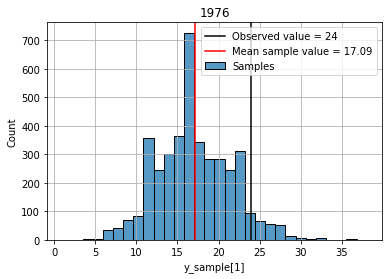

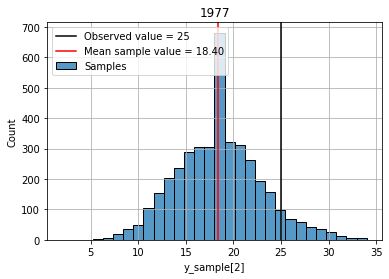

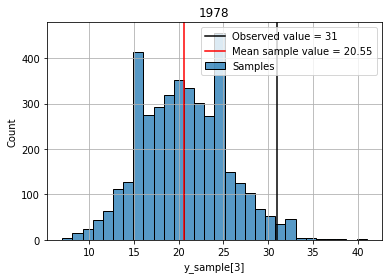

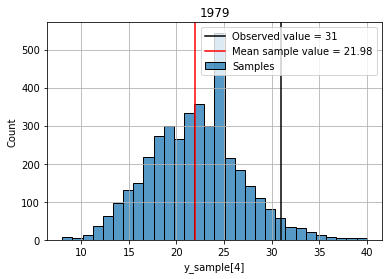

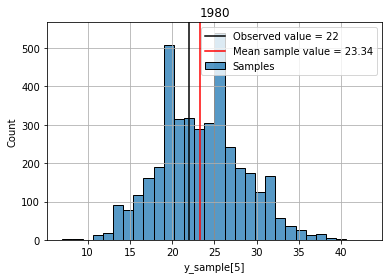

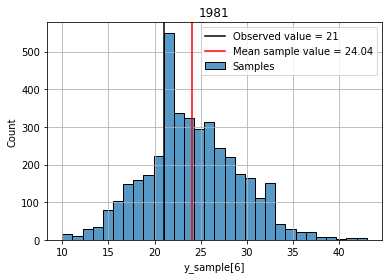

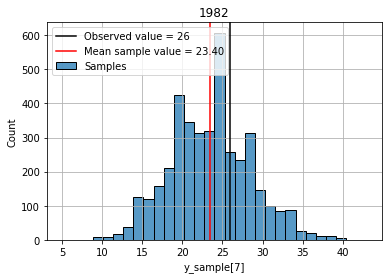

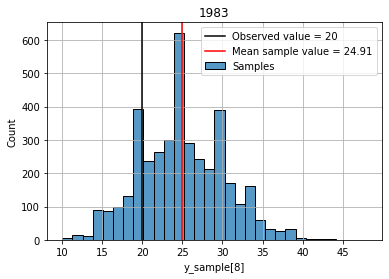

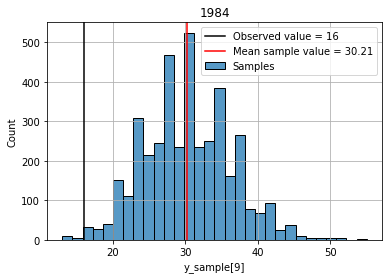

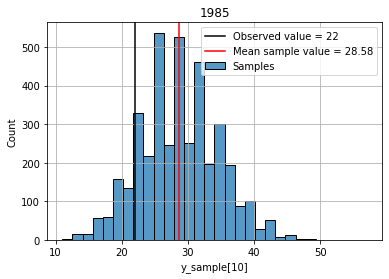

In [79]:
for i in range(df.shape[0]):
    it = str(i+1)
    y_sample_i = fit_df[f'y_sample[{it}]']
    sns.histplot(data=fit_df, x=y_sample_i, bins=30, label='Samples')
    plt.axvline(df["Fatal accidents"][i], color = 'k', label=f'Observed value = {df["Fatal accidents"][i]}')
    plt.axvline(y_sample_i.mean(), color = 'r', label=f'Mean sample value = {y_sample_i.mean():.2f}')
    plt.grid(True)
    plt.title(df['Year'].values[i])
    plt.legend()
    plt.show()

### FIT 2

In [81]:
model_fit2 = CmdStanModel(stan_file='model_fit2.stan')

fit = model_fit2.sample(data={"n": df.shape[0], 
                              "log_miles": df["Miles flown [100 mln miles]"].values, 
                              "y": df["Fatal accidents"].values})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [82]:
fit_df = fit.draws_pd()
fit_df.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha[1],alpha[2],alpha[3],...,y_sample[1],y_sample[2],y_sample[3],y_sample[4],y_sample[5],y_sample[6],y_sample[7],y_sample[8],y_sample[9],y_sample[10]
0,507.243,0.892834,0.404377,3.0,7.0,0.0,-502.750,1.58636,1.55227,1.39682,...,13.0,22.0,17.0,34.0,12.0,25.0,32.0,18.0,14.0,31.0
1,507.888,0.979849,0.404377,3.0,15.0,0.0,-500.401,1.55739,1.62265,1.58883,...,14.0,23.0,25.0,41.0,16.0,24.0,39.0,27.0,25.0,12.0
2,509.939,1.000000,0.404377,3.0,7.0,0.0,-505.497,1.53095,1.74642,1.48346,...,16.0,21.0,15.0,31.0,14.0,17.0,17.0,23.0,26.0,28.0
3,511.522,0.955610,0.404377,3.0,7.0,0.0,-508.070,1.60428,1.51833,1.64205,...,23.0,28.0,33.0,21.0,36.0,18.0,16.0,19.0,14.0,34.0
4,508.063,0.886828,0.404377,3.0,7.0,0.0,-506.426,1.45633,1.66750,1.90403,...,24.0,25.0,35.0,32.0,24.0,11.0,36.0,24.0,29.0,25.0


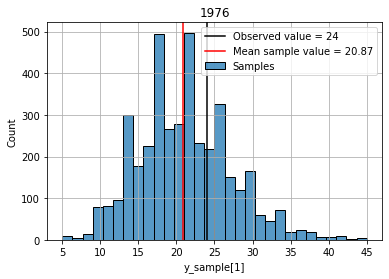

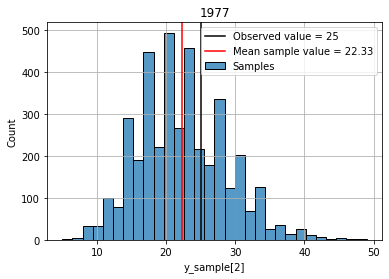

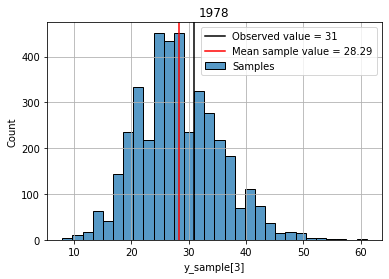

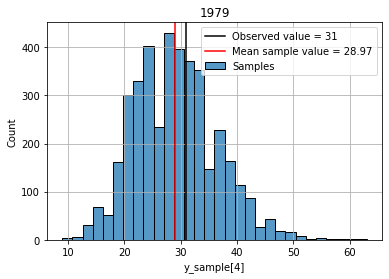

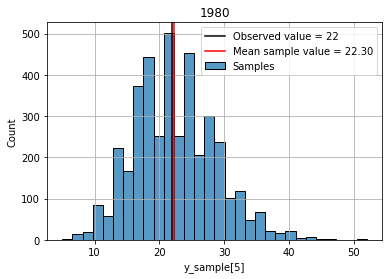

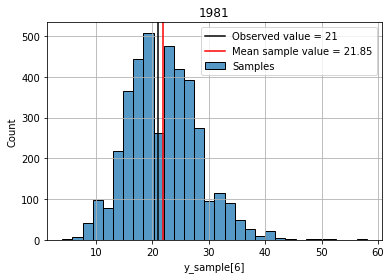

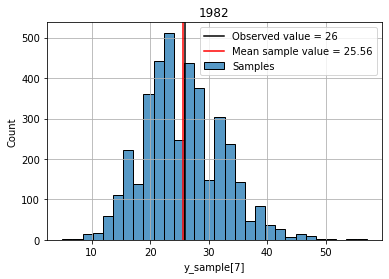

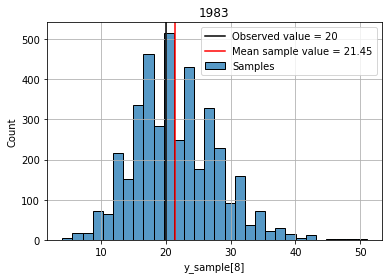

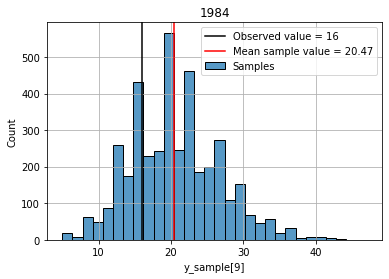

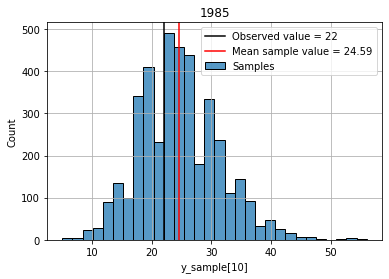

In [83]:
for i in range(df.shape[0]):
    it = str(i+1)
    y_sample_i = fit_df[f'y_sample[{it}]']
    sns.histplot(data=fit_df, x=y_sample_i, bins=30, label='Samples')
    plt.axvline(df["Fatal accidents"][i], color = 'k', label=f'Observed value = {df["Fatal accidents"][i]}')
    plt.axvline(y_sample_i.mean(), color = 'r', label=f'Mean sample value = {y_sample_i.mean():.2f}')
    plt.grid(True)
    plt.title(df['Year'].values[i])
    plt.legend()
    plt.show()

In [ ]:
# The model's performance was enhanced by substituting the solitary intercept alpha with separate intercepts of alpha_i for each year. 
# This modification resulted in a better alignment with the provided data and significantly improved the accuracy of predictions.